In [1]:
#import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import sklearn
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
dataset = pd.read_csv('Melbourne_housing_extra_data-18-08-2017.csv')
# Number of rows and columns
print(dataset.shape)

# View first few records
dataset

(19741, 21)


Suburb               Address  Rooms Type      Price Method  \
0          Abbotsford         68 Studley St      2    h        NaN     SS   
1          Abbotsford          85 Turner St      2    h  1480000.0      S   
2          Abbotsford       25 Bloomburg St      2    h  1035000.0      S   
3          Abbotsford    18/659 Victoria St      3    u        NaN     VB   
4          Abbotsford          5 Charles St      3    h  1465000.0     SP   
5          Abbotsford      40 Federation La      3    h   850000.0     PI   
6          Abbotsford           55a Park St      4    h  1600000.0     VB   
7          Abbotsford          16 Maugie St      4    h        NaN     SN   
8          Abbotsford          53 Turner St      2    h        NaN      S   
9          Abbotsford          99 Turner St      2    h        NaN      S   
10         Abbotsford        129 Charles St      2    h   941000.0      S   
11         Abbotsford          124 Yarra St      3    h  1876000.0      S   
12         Abbotsford   121/56 Nicholson St      2    u        NaN     PI   
13         Abbotsford         17 Raphael St      4    h        NaN      W   
14         Abbotsford         98 Charles St      2    h  1636000.0      S   
15         Abbotsford      217 Langridge St      3    h  1000000.0      S   
16         Abbotsford       18a Mollison St      2    t   745000.0      S   
17         Abbotsford    6/241 Nicholson St      1    u   300000.0      S   
18         Abbotsford         10 Valiant St      2    h  1097000.0      S   
19         Abbotsford   403/609 Victoria St      2    u   542000.0      S   
20         Abbotsford             2 Rich St      2    h        NaN     SP   
21         Abbotsford     25/84 Trenerry Cr      2    u   760000.0     SP   
22         Abbotsford     106/119 Turner St      1    u   481000.0     SP   
23         Abbotsford    411/8 Grosvenor St      2    u   700000.0     VB   
24         Abbotsford       40 Nicholson St      3    h  1350000.0     VB   
25         Abbotsford   123/56 Nicholson St      2    u   750000.0      S   
26         Abbotsford            22 Park St      4    h  1985000.0      S   
27         Abbotsford     13/84 Trenerry Cr      1    u   500000.0      S   
28         Abbotsford         45 William St      2    h  1172500.0      S   
29         Abbotsford    7/20 Abbotsford St      1    u   441000.0     SP   
...               ...                   ...    ...  ...        ...    ...   
19711        Wantirna       33 Dunbarton Dr      4    h   908000.0      S   
19712        Wantirna             9 Eton Sq      4    h   850000.0     VB   
19713        Wantirna       16 Mariemont Av      4    h  1200000.0      S   
19714        Wantirna          4 Traydal Cl      3    h        NaN     SN   
19715  Wantirna South          11 Kirrum Cl      5    h  1310000.0      S   
19716  Wantirna South          41 Witken Av      4    h   930000.0      S   
19717        Watsonia       2/10 Powley Pde      2    u   686000.0      S   
19718  Watsonia North           9 Binnak Dr      4    h        NaN     PI   
19719  Watsonia North         33 MacOrna St      4    h   755000.0      S   
19720        Werribee          12 Bridge St      2    h   678000.0      S   
19721        Werribee        18 Conquest Dr      4    h   645000.0     PI   
19722        Werribee        46 Coventry Dr      4    h   482500.0      S   
19723        Werribee     13b Kingfisher Ct      3    u   394000.0     PI   
19724        Werribee         40 Tarneit Rd      3    h   597000.0      S   
19725  West Footscray       12/102 Cross St      2    u        NaN     SP   
19726  West Footscray     24 Elphinstone St      4    h  1300000.0     SP   
19727     Westmeadows         43 Bamford Av      4    h   821000.0      S   
19728     Westmeadows       170 Erinbank Cr      3    h        NaN     SP   
19729     Westmeadows         4 Pershore Ct      3    h   635000.0      S   
19730   Wheelers Hill           7 Ondine Dr      5    h  1095000.0      S   
19731   Whe

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 21 columns):
Suburb           19741 non-null object
Address          19741 non-null object
Rooms            19741 non-null int64
Type             19741 non-null object
Price            15397 non-null float64
Method           19741 non-null object
SellerG          19741 non-null object
Date             19741 non-null object
Distance         19740 non-null float64
Postcode         19740 non-null float64
Bedroom2         15686 non-null float64
Bathroom         15686 non-null float64
Car              15686 non-null float64
Landsize         15659 non-null float64
BuildingArea     8382 non-null float64
YearBuilt        9649 non-null float64
CouncilArea      15656 non-null object
Lattitude        15804 non-null float64
Longtitude       15804 non-null float64
Regionname       19740 non-null object
Propertycount    19740 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 3.2+ MB


In [4]:
print(dataset.select_dtypes(['object']).columns)


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [5]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category') 
    
dataset['Date'] = pd.to_datetime(dataset['Date'])
print(dataset)

               Suburb               Address  Rooms Type      Price Method  \
0          Abbotsford         68 Studley St      2    h        NaN     SS   
1          Abbotsford          85 Turner St      2    h  1480000.0      S   
2          Abbotsford       25 Bloomburg St      2    h  1035000.0      S   
3          Abbotsford    18/659 Victoria St      3    u        NaN     VB   
4          Abbotsford          5 Charles St      3    h  1465000.0     SP   
5          Abbotsford      40 Federation La      3    h   850000.0     PI   
6          Abbotsford           55a Park St      4    h  1600000.0     VB   
7          Abbotsford          16 Maugie St      4    h        NaN     SN   
8          Abbotsford          53 Turner St      2    h        NaN      S   
9          Abbotsford          99 Turner St      2    h        NaN      S   
10         Abbotsford        129 Charles St      2    h   941000.0      S   
11         Abbotsford          124 Yarra St      3    h  1876000.0      S   

In [6]:
dataset.describe().transpose()

count          mean            std          min  \
Rooms          19741.0  2.947115e+00       0.981046      1.00000   
Price          15397.0  1.054929e+06  645244.681529  85000.00000   
Distance       19740.0  9.862660e+00       5.553402      0.00000   
Postcode       19740.0  3.106525e+03      88.413069   3000.00000   
Bedroom2       15686.0  2.908262e+00       1.006038      0.00000   
Bathroom       15686.0  1.551320e+00       0.713287      0.00000   
Car            15686.0  1.583641e+00       0.972224      0.00000   
Landsize       15659.0  5.381542e+02    3709.919527      0.00000   
BuildingArea    8382.0  1.488852e+02     139.087299      0.00000   
YearBuilt       9649.0  1.963394e+03      38.021476   1196.00000   
Lattitude      15804.0 -3.781181e+01       0.074268    -38.18418   
Longtitude     15804.0  1.449969e+02       0.098467    144.43162   
Propertycount  19740.0  7.508448e+03    4419.294842    249.00000   

                         25%          50%           75%           max  
Rooms               2.000000       3.0000  4.000000e+00  1.200000e+01  
Price          630000.000000  880000.0000  1.301000e+06  9.000000e+06  
Distance            6.100000       9.2000  1.260000e+01  4.740000e+01  
Postcode         3046.000000    3101.0000  3.147000e+03  3.978000e+03  
Bedroom2            2.000000       3.0000  3.000000e+00  3.000000e+01  
Bathroom            1.000000       1.0000  2.000000e+00  1.200000e+01  
Car                 1.000000       2.0000  2.000000e+00  2.600000e+01  
Landsize          165.000000     410.0000  6.500000e+02  4.330140e+05  
BuildingArea       93.000000     127.0000  1.780000e+02  6.791000e+03  
YearBuilt        1940.000000    1970.0000  1.999000e+03  2.106000e+03  
Lattitude         -37.857202     -37.8089 -3.776110e+01 -3.741381e+01  
Longtitude        144.938813     145.0012  1.450560e+02  1.455264e+02  
Propertycount    4407.000000    6567.0000  1.033100e+04  2.165000e+04

In [7]:
# Convert numeric variables to categorical

dataset['Postcode'] = dataset[colname].astype('category')   

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 21 columns):
Suburb           19741 non-null category
Address          19741 non-null category
Rooms            19741 non-null int64
Type             19741 non-null category
Price            15397 non-null float64
Method           19741 non-null category
SellerG          19741 non-null category
Date             19741 non-null datetime64[ns]
Distance         19740 non-null float64
Postcode         19740 non-null category
Bedroom2         15686 non-null float64
Bathroom         15686 non-null float64
Car              15686 non-null float64
Landsize         15659 non-null float64
BuildingArea     8382 non-null float64
YearBuilt        9649 non-null float64
CouncilArea      15656 non-null category
Lattitude        15804 non-null float64
Longtitude       15804 non-null float64
Regionname       19740 non-null category
Propertycount    19740 non-null float64
dtypes: category(8), datetime64[ns](1), 

In [8]:
#room ve bedroom2 are from different sources. Basically they are same. We can see their difference is 0.

dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

Suburb               Address  Rooms Type      Price Method  \
0          Abbotsford         68 Studley St      2    h        NaN     SS   
1          Abbotsford          85 Turner St      2    h  1480000.0      S   
2          Abbotsford       25 Bloomburg St      2    h  1035000.0      S   
3          Abbotsford    18/659 Victoria St      3    u        NaN     VB   
4          Abbotsford          5 Charles St      3    h  1465000.0     SP   
5          Abbotsford      40 Federation La      3    h   850000.0     PI   
6          Abbotsford           55a Park St      4    h  1600000.0     VB   
7          Abbotsford          16 Maugie St      4    h        NaN     SN   
8          Abbotsford          53 Turner St      2    h        NaN      S   
9          Abbotsford          99 Turner St      2    h        NaN      S   
10         Abbotsford        129 Charles St      2    h   941000.0      S   
11         Abbotsford          124 Yarra St      3    h  1876000.0      S   
12         Abbotsford   121/56 Nicholson St      2    u        NaN     PI   
13         Abbotsford         17 Raphael St      4    h        NaN      W   
14         Abbotsford         98 Charles St      2    h  1636000.0      S   
15         Abbotsford      217 Langridge St      3    h  1000000.0      S   
16         Abbotsford       18a Mollison St      2    t   745000.0      S   
17         Abbotsford    6/241 Nicholson St      1    u   300000.0      S   
18         Abbotsford         10 Valiant St      2    h  1097000.0      S   
19         Abbotsford   403/609 Victoria St      2    u   542000.0      S   
20         Abbotsford             2 Rich St      2    h        NaN     SP   
21         Abbotsford     25/84 Trenerry Cr      2    u   760000.0     SP   
22         Abbotsford     106/119 Turner St      1    u   481000.0     SP   
23         Abbotsford    411/8 Grosvenor St      2    u   700000.0     VB   
24         Abbotsford       40 Nicholson St      3    h  1350000.0     VB   
25         Abbotsford   123/56 Nicholson St      2    u   750000.0      S   
26         Abbotsford            22 Park St      4    h  1985000.0      S   
27         Abbotsford     13/84 Trenerry Cr      1    u   500000.0      S   
28         Abbotsford         45 William St      2    h  1172500.0      S   
29         Abbotsford    7/20 Abbotsford St      1    u   441000.0     SP   
...               ...                   ...    ...  ...        ...    ...   
19711        Wantirna       33 Dunbarton Dr      4    h   908000.0      S   
19712        Wantirna             9 Eton Sq      4    h   850000.0     VB   
19713        Wantirna       16 Mariemont Av      4    h  1200000.0      S   
19714        Wantirna          4 Traydal Cl      3    h        NaN     SN   
19715  Wantirna South          11 Kirrum Cl      5    h  1310000.0      S   
19716  Wantirna South          41 Witken Av      4    h   930000.0      S   
19717        Watsonia       2/10 Powley Pde      2    u   686000.0      S   
19718  Watsonia North           9 Binnak Dr      4    h        NaN     PI   
19719  Watsonia North         33 MacOrna St      4    h   755000.0      S   
19720        Werribee          12 Bridge St      2    h   678000.0      S   
19721        Werribee        18 Conquest Dr      4    h   645000.0     PI   
19722        Werribee        46 Coventry Dr      4    h   482500.0      S   
19723        Werribee     13b Kingfisher Ct      3    u   394000.0     PI   
19724        Werribee         40 Tarneit Rd      3    h   597000.0      S   
19725  West Footscray       12/102 Cross St      2    u        NaN     SP   
19726  West Footscray     24 Elphinstone St      4    h  1300000.0     SP   
19727     Westmeadows         43 Bamford Av      4    h   821000.0      S   
19728     Westmeadows       170 Erinbank Cr      3    h        NaN     SP   
19729     Westmeadows         4 Pershore Ct      3    h   635000.0      S   
19730   Wheelers Hill           7 Ondine Dr      5    h  1095000.0      S   
19731   Whe

In [9]:
#So we drop unnecessary variables.
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1) 

In [10]:
# Add age variable. Since the data is from 2017 we look at the age at 2017. 
dataset['Age'] = 2017 - dataset['YearBuilt']

# Identify historic homes
dataset['Historic'] = np.where(dataset['Age']>=50,'Historic','Contemporary')

# Convert to Category
dataset['Historic'] = dataset['Historic'].astype('category')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 22 columns):
Suburb           19741 non-null category
Address          19741 non-null category
Rooms            19741 non-null int64
Type             19741 non-null category
Price            15397 non-null float64
Method           19741 non-null category
SellerG          19741 non-null category
Date             19741 non-null datetime64[ns]
Distance         19740 non-null float64
Postcode         19740 non-null category
Bathroom         15686 non-null float64
Car              15686 non-null float64
Landsize         15659 non-null float64
BuildingArea     8382 non-null float64
YearBuilt        9649 non-null float64
CouncilArea      15656 non-null category
Lattitude        15804 non-null float64
Longtitude       15804 non-null float64
Regionname       19740 non-null category
Propertycount    19740 non-null float64
Age              9649 non-null float64
Historic         19741 non-null category


In [12]:
#number of null values
dataset.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
Age              10092
Historic             0
dtype: int64

In [13]:
# Remove rows missing data, drop the row which includes at least 1 null value
dataset = dataset.dropna()

# Confirm that observations missing data were removed  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 2 to 19739
Data columns (total 22 columns):
Suburb           6196 non-null category
Address          6196 non-null category
Rooms            6196 non-null int64
Type             6196 non-null category
Price            6196 non-null float64
Method           6196 non-null category
SellerG          6196 non-null category
Date             6196 non-null datetime64[ns]
Distance         6196 non-null float64
Postcode         6196 non-null category
Bathroom         6196 non-null float64
Car              6196 non-null float64
Landsize         6196 non-null float64
BuildingArea     6196 non-null float64
YearBuilt        6196 non-null float64
CouncilArea      6196 non-null category
Lattitude        6196 non-null float64
Longtitude       6196 non-null float64
Regionname       6196 non-null category
Propertycount    6196 non-null float64
Age              6196 non-null float64
Historic         6196 non-null category
dtypes: category(9),

In [14]:
dataset.describe().transpose()


count          mean            std           min  \
Rooms          6196.0  2.931407e+00       0.971079       1.00000   
Price          6196.0  1.068828e+06  675156.427502  131000.00000   
Distance       6196.0  9.751097e+00       5.612065       0.00000   
Bathroom       6196.0  1.576340e+00       0.711362       1.00000   
Car            6196.0  1.573596e+00       0.929947       0.00000   
Landsize       6196.0  4.710069e+02     897.449881       0.00000   
BuildingArea   6196.0  1.415686e+02      90.834824       0.00000   
YearBuilt      6196.0  1.964082e+03      38.105673    1196.00000   
Lattitude      6196.0 -3.780790e+01       0.075850     -38.16492   
Longtitude     6196.0  1.449902e+02       0.099165     144.54237   
Propertycount  6196.0  7.435490e+03    4337.698917     389.00000   
Age            6196.0  5.291801e+01      38.105673      -1.00000   

                         25%           50%           75%           max  
Rooms               2.000000       3.00000  4.000000e+00  8.000000e+00  
Price          620000.000000  880000.00000  1.325000e+06  9.000000e+06  
Distance            5.900000       9.00000  1.240000e+01  4.740000e+01  
Bathroom            1.000000       1.00000  2.000000e+00  8.000000e+00  
Car                 1.000000       1.00000  2.000000e+00  1.000000e+01  
Landsize          152.000000     373.00000  6.280000e+02  3.700000e+04  
BuildingArea       91.000000     124.00000  1.700000e+02  3.112000e+03  
YearBuilt        1940.000000    1970.00000  2.000000e+03  2.018000e+03  
Lattitude         -37.855438     -37.80225 -3.775820e+01 -3.745709e+01  
Longtitude        144.926198     144.99580  1.450527e+02  1.455264e+02  
Propertycount    4383.750000    6567.00000  1.017500e+04  2.165000e+04  
Age                17.000000      47.00000  7.700000e+01  8.210000e+02

In [15]:
#dropping extreme values(outliers). There is one house which is builded 1196.
dataset[dataset['Age']>800]


Suburb         Address  Rooms Type      Price Method  SellerG  \
16424  Mount Waverley  5 Armstrong St      3    h  1200000.0     VB  McGrath   

            Date  Distance              Postcode    ...     Landsize  \
16424 2017-06-24      14.2  Eastern Metropolitan    ...        807.0   

       BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
16424         117.0     1196.0       Monash  -37.86788  145.12121   

                 Regionname  Propertycount    Age  Historic  
16424  Eastern Metropolitan        13366.0  821.0  Historic  

[1 rows x 22 columns]

In [16]:
dataset = dataset[dataset['Age']<=800]
print(dataset.shape)

(6195, 22)


In [17]:
#dropping the ones that doent have a building area or a landsize. Probably these are mistakes or missing values.
dataset[dataset['BuildingArea']==0]


Suburb       Address  Rooms Type     Price Method SellerG  \
7211  North Melbourne  19 Shands La      2    t  841000.0      S  Jellis   

           Date  Distance               Postcode      ...       Landsize  \
7211 2017-04-03       2.3  Northern Metropolitan      ...          215.0   

      BuildingArea  YearBuilt  CouncilArea  Lattitude Longtitude  \
7211           0.0     2000.0    Melbourne   -37.7953   144.9437   

                 Regionname  Propertycount   Age      Historic  
7211  Northern Metropolitan         6821.0  17.0  Contemporary  

[1 rows x 22 columns]

In [18]:
dataset[dataset['Landsize']==0]

Suburb                Address  Rooms Type      Price Method  \
25           Abbotsford    123/56 Nicholson St      2    u   750000.0      S   
42           Abbotsford     6/219 Nicholson St      2    u   500000.0      S   
57           Abbotsford        11/205 Gipps St      1    u   470000.0      S   
67         Airport West          50 Bedford St      3    h   730000.0     VB   
68         Airport West          50 Bedford St      3    h   770000.0     SP   
88         Airport West            13 Etzel St      3    h   805000.0      S   
155         Albert Park        4a Gatehouse La      3    h  1370000.0      S   
177         Albert Park       13/52 Moubray St      1    u   442500.0      S   
217          Alphington          5/5 Yarana Rd      2    u   390000.0     VB   
219          Alphington         1/14 Fulham Rd      2    u   512000.0      S   
249              Altona        4/31 Millers Rd      2    u   391000.0     SP   
295        Altona North          1/5 Little St      3    h   720000.0     VB   
365            Armadale         8/19 Mercer Rd      2    u   599000.0      S   
367            Armadale       14/71 Denbigh Rd      3    u   995000.0      S   
380            Armadale         3/20 Mercer Rd      3    t  1918000.0     SP   
402            Armadale    15/405 Dandenong Rd      1    u   280000.0     PI   
407            Armadale     8/58 Sutherland Rd      2    u   592500.0      S   
432            Armadale       10/581 Orrong Rd      1    u   440000.0     SP   
441            Armadale       6/51 Armadale St      2    u   704000.0     SP   
444            Armadale       12/41 Kooyong Rd      2    u   620000.0     VB   
455            Armadale        1/14 Denbigh Rd      2    u   598000.0      S   
461            Armadale     1/403 Dandenong Rd      2    u   520000.0      S   
473            Armadale         1/31 Mercer Rd      3    u   869000.0      S   
480            Armadale        5/555 Orrong Rd      1    u   567000.0      S   
487          Ascot Vale        9/5 Rothwell St      2    u   467000.0     SP   
527          Ascot Vale       8/129 The Parade      1    u   390000.0      S   
536          Ascot Vale         3/28 Ormond Rd      2    u   432000.0      S   
550          Ascot Vale         12/9 Milton St      2    u   442000.0      S   
555          Ascot Vale      4/27 Roseberry St      2    u   440000.0      S   
749    Avondale Heights          9 Rogerson St      3    h   750000.0     SP   
...                 ...                    ...    ...  ...        ...    ...   
18889          Carnegie        5/9 Cosy Gum Rd      2    u   796000.0      S   
18907       Collingwood            53 Mater St      2    h  1080000.0      S   
18933    Doncaster East       18B Churchill St      3    t   816000.0      S   
18942    East Melbourne   205/30 St Andrews Pl      1    u   895000.0      S   
19021        Hughesdale         3/9 Clapham Rd      2    u   472000.0      S   
19031               Kew        38 Wiltshire Dr      2    u   591000.0      S   
19074      Moonee Ponds  16/122 Maribyrnong Rd      1    u   362000.0      S   
19094   North Melbourne     306/64 MacAulay Rd      2    u   465000.0     SP   
19126         Reservoir        1/3 Drysdale St      2    t   617500.0     SP   
19135          Richmond         306/45 York St      2    u   685000.0     SP   
19158       South Yarra       7/85 Caroline St      1    u   420000.0      S   
19159       South Yarra     804/2 Claremont St      2    u   460000.0     VB   
19160       South Yarra       10/391 Toorak Rd      2    u  1340000.0      S   
19167          St Kilda        8/240 Barkly St      1    u   360000.0      S   
19212            Toorak     8/161 Alexandra Av      2    u   735000.0     SP   
19293        Black Rock         5/323 Beach Rd      2    u   600000.0      S   
19321    Brunswick East      3/51 Brunswick Rd      2    h   683000.0      S   
19324    Brunswick East    603/29 Nicholson St      2    u   615000.0     SP   
19370      Clifto

In [19]:
# Remove outliers
dataset = dataset[dataset['BuildingArea']!=0]
dataset = dataset[dataset['Landsize']!=0]
# Confirm removal
dataset.describe().transpose()

count          mean            std           min          25%  \
Rooms          5179.0  3.118942e+00       0.903913       1.00000       3.0000   
Price          5179.0  1.156088e+06  691756.202437  131000.00000  700000.0000   
Distance       5179.0  1.040129e+01       5.714758       0.00000       6.6000   
Bathroom       5179.0  1.641050e+00       0.732951       1.00000       1.0000   
Car            5179.0  1.658428e+00       0.968882       0.00000       1.0000   
Landsize       5179.0  5.633012e+02     954.759205       1.00000     247.5000   
BuildingArea   5179.0  1.531219e+02      91.115236       1.00000     104.0000   
YearBuilt      5179.0  1.961473e+03      37.620857    1830.00000    1930.0000   
Lattitude      5179.0 -3.780490e+01       0.079409     -38.16492     -37.8541   
Longtitude     5179.0  1.449915e+02       0.105635     144.54237     144.9195   
Propertycount  5179.0  7.252996e+03    4342.218961     389.00000    4019.0000   
Age            5179.0  5.552694e+01      37.620857      -1.00000      20.0000   

                       50%           75%           max  
Rooms               3.0000  4.000000e+00  8.000000e+00  
Price          960000.0000  1.416375e+06  9.000000e+06  
Distance            9.7000  1.300000e+01  4.740000e+01  
Bathroom            2.0000  2.000000e+00  8.000000e+00  
Car                 2.0000  2.000000e+00  1.000000e+01  
Landsize          488.0000  6.600000e+02  3.700000e+04  
BuildingArea      133.0000  1.802800e+02  3.112000e+03  
YearBuilt        1965.0000  1.997000e+03  2.018000e+03  
Lattitude         -37.7961 -3.775174e+01 -3.745709e+01  
Longtitude        144.9989  1.450605e+02  1.455264e+02  
Propertycount    6482.0000  9.264000e+03  2.165000e+04  
Age                52.0000  8.700000e+01  1.870000e+02

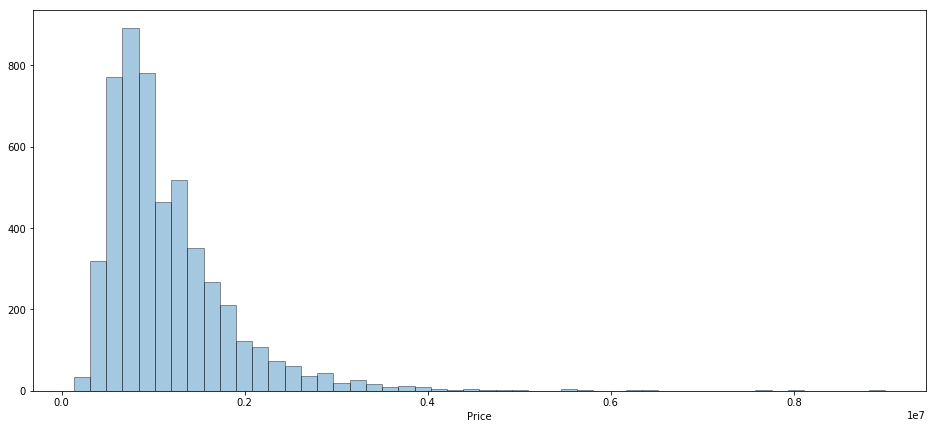

In [20]:
#plot the price distribution
plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))

In [21]:
# Identify categorical features
dataset.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [22]:
# Rename the regionnames with short abbreviations.
dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

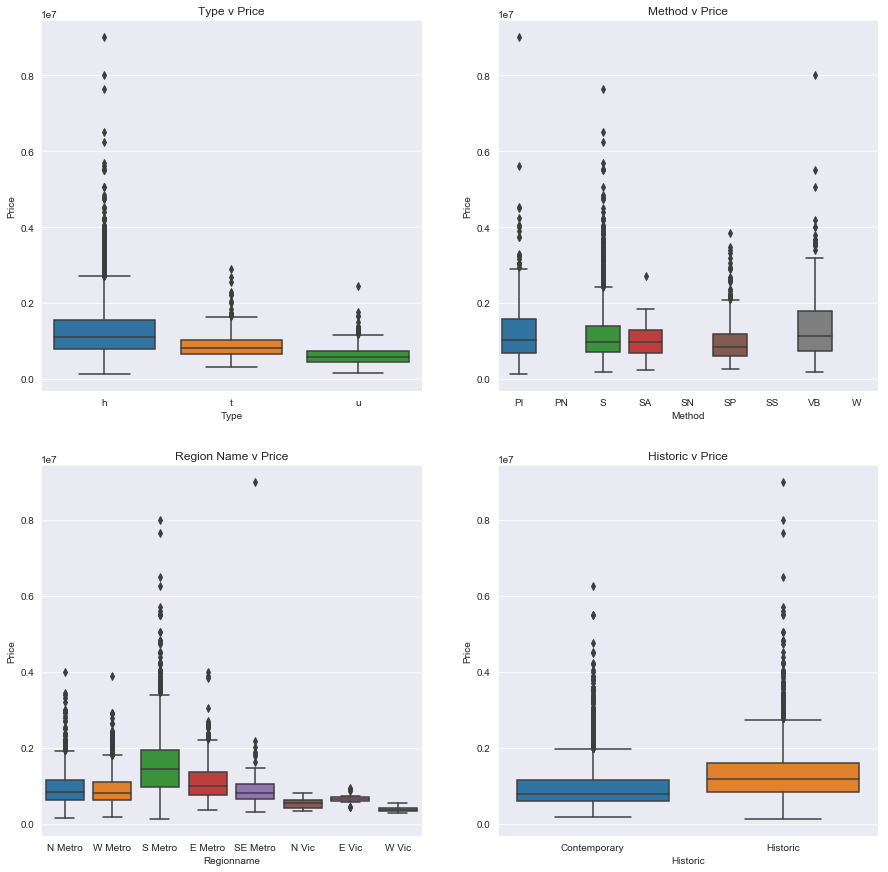

In [23]:
# Subplots categorical features v price.
# For example 0,0 shows: the price distributions of "h" "t" "u" type houses seperately.

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = dataset, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

In [24]:
#add dummy variables for house types

dataset['h'] = np.where(dataset['Type']=='h', 1, 0)
dataset['u'] = np.where(dataset['Type']=='u', 1, 0)
dataset['t'] = np.where(dataset['Type']=='t', 1, 0)

dataset

Suburb             Address  Rooms Type      Price Method  \
2             Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
4             Abbotsford        5 Charles St      3    h  1465000.0     SP   
6             Abbotsford         55a Park St      4    h  1600000.0     VB   
11            Abbotsford        124 Yarra St      3    h  1876000.0      S   
14            Abbotsford       98 Charles St      2    h  1636000.0      S   
18            Abbotsford       10 Valiant St      2    h  1097000.0      S   
24            Abbotsford     40 Nicholson St      3    h  1350000.0     VB   
30            Abbotsford       16 William St      2    h  1310000.0      S   
32            Abbotsford         42 Henry St      3    h  1200000.0      S   
35            Abbotsford         78 Yarra St      3    h  1176500.0      S   
37            Abbotsford       42 Valiant St      2    h   890000.0      S   
38            Abbotsford     3/72 Charles St      4    h  1330000.0     PI   
43            Abbotsford      52a William St      2    h  1100000.0     PI   
44            Abbotsford          49 Park St      2    h  1315000.0      S   
49            Abbotsford    48 Abbotsford St      3    h  1447500.0     PI   
51            Abbotsford         159 Park St      2    h  1135000.0      S   
56            Abbotsford      60 Stafford St      3    h  1290000.0      S   
58            Abbotsford       47 Studley St      2    h  1180000.0      S   
59            Abbotsford         45 Yarra St      3    h  1195000.0     SP   
61            Abbotsford    200 Nicholson St      2    h  1012500.0      S   
63            Abbotsford       27 Charles St      2    h  1030000.0      S   
66          Airport West       154 Halsey Rd      3    t   840000.0     PI   
70          Airport West          23 Hart St      2    h   603000.0      S   
71          Airport West      1/80 Hawker St      3    t   700000.0      S   
72          Airport West    1/37 Hillside Gr      3    h   600000.0      S   
73          Airport West    2/49 McIntosh St      2    u   500000.0     VB   
81          Airport West    11 Harrington Rd      6    h   725000.0     SP   
82          Airport West      2/252 Parer Rd      2    t   450000.0      S   
83          Airport West        3/19 Hart St      2    u   515000.0      S   
85          Airport West  2/62 Clydesdale Rd      2    u   530000.0      S   
...                  ...                 ...    ...  ...        ...    ...   
19657      Roxburgh Park      13 McKinley Dr      3    h   460000.0      S   
19658      Roxburgh Park      10 Sheridan Wy      3    h   490000.0      S   
19659        Sandringham           6 Duff St      4    h  1660000.0      S   
19660        Sandringham        1/10 Reno Rd      4    h  1235000.0      S   
19662            Seaford        18 Catron St      4    h   870000.0      S   
19663            Seaford        13 Hayman Av      4    h   880000.0      S   
19665             Seddon     2/70 Windsor St      2    h   945000.0     SP   
19666   South Kingsville          89A New St      3    t   730000.0      S   
19668    South Melbourne     372 Coventry St      2    h   980000.0     VB   
19687            Sunbury      1/6 Anthony St      2    u   360000.0     SP   
19690            Sunbury     19 Muirfield Dr      3    h   475000.0      S   
19691            Sunbury        26 Xavier Ct      3    h   495000.0      S   
19693      Sunshine West            2 Day St      3    h   695000.0      S   
19694      Sunshine West         73 Hilma St      3    h   760000.0      S   
19695      Sunshine West      18 Marchant Cr      3    h   583500.0      S   
19697           Sydenham      23 Contursi Dr      3    h   585000.0      S   
19702  Templestowe Lower       51 Jeffrey St      3    h  1245000.0      S   
19703  Templestowe Lower     13 Melaleuca Av      6    h  2000000.0     VB   
19705         Thomastown      2/1 Charles St      2    u   407000.0      S   
19708          Thornbury       13 Raymen

In [25]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age', 'h', 'u', 't'],
      dtype='object')

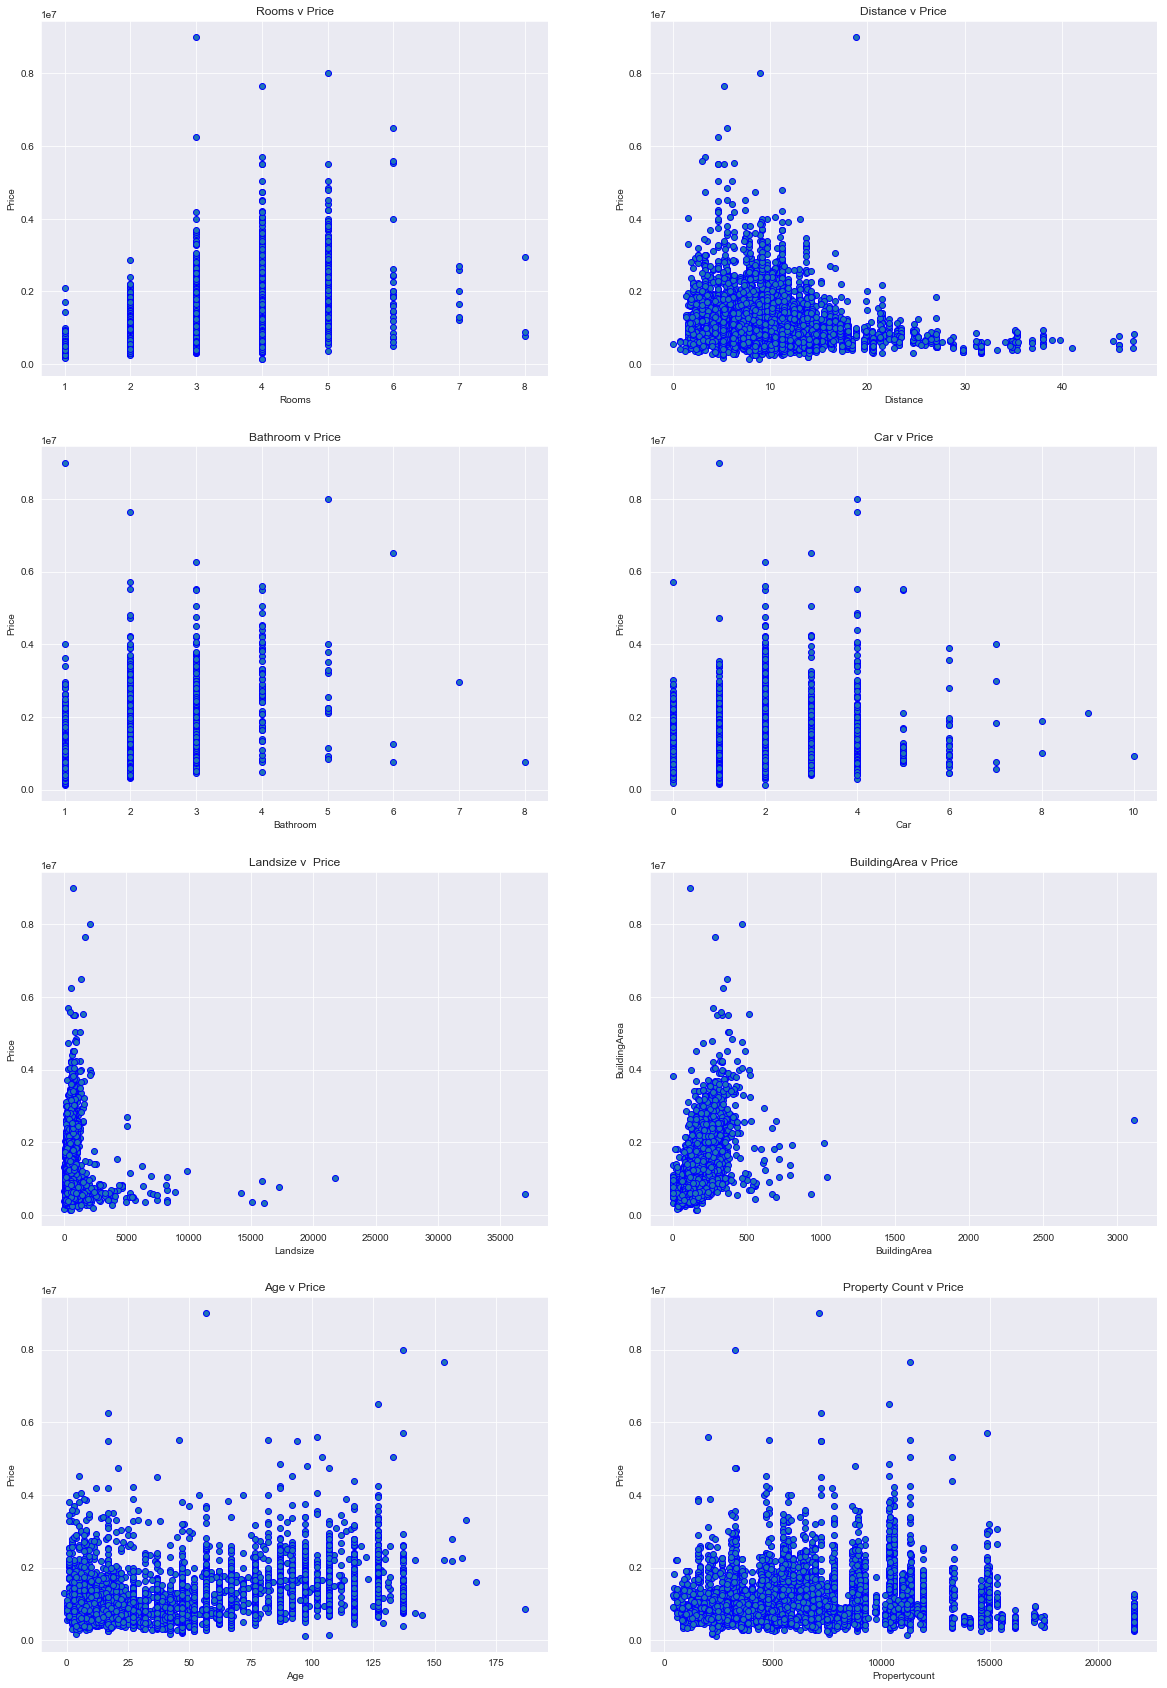

In [26]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

Text(0.5, 1.0, 'Variable Correlation')

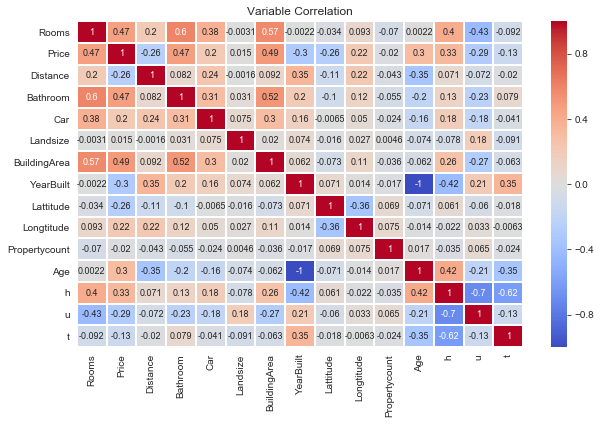

In [27]:
#heat map which shows the correlation between numeric variables.

plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')


In [28]:
#Distance variables are changing with the Suburb. Basically same thing.
#Propertycount is not correlated with price.
#Age and Historic are same thing.
#Adress is house specific.
#So we use these variables for our regression: 
#'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Longtitude','Age','BuildingArea','Lattitude','h','t','u'

# Independent variables:
X =dataset[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
           'Longtitude','Age','BuildingArea','Lattitude','h','t','u']]

# Dependent variable
y = dataset['Price']


# Split the train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [29]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)
#fit lin. regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [30]:
#define models
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]

#find accuracies for train set.
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(X_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 72.64 %
Accuracy of random forest= 93.16 %
Accuracy of decision tree= 99.98 %


In [31]:
#find accuracies for test set.
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(X_test)
    # Performance metrics
    errors = abs(predictions - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_test))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 73.62 %
Accuracy of random forest= 83.50 %
Accuracy of decision tree= 78.92 %


In [32]:
#Overfitting in Random Forest and DEcision Trees are observed due to the differences in accuracy levels for train and test sets.
#We use mean absolute percantage error metrically because we don't have classification data. 
#What is important for us is how much we get closer to the true price with our estimation.

#linear regression coefficients
cdf = pd.DataFrame(data = lin_reg.coef_, index = X.columns, columns = ['Coefficients'])
pd.options.display.float_format = '{:20,.2f}'.format
cdf

Coefficients
Rooms                  123,533.92
Distance               -40,366.56
Bathroom               236,699.13
Car                     62,542.82
Landsize                     9.07
Longtitude           1,022,057.82
Age                      3,789.91
BuildingArea             1,677.59
Lattitude           -1,641,505.39
h                      122,327.39
t                      -32,187.81
u                      -90,139.58

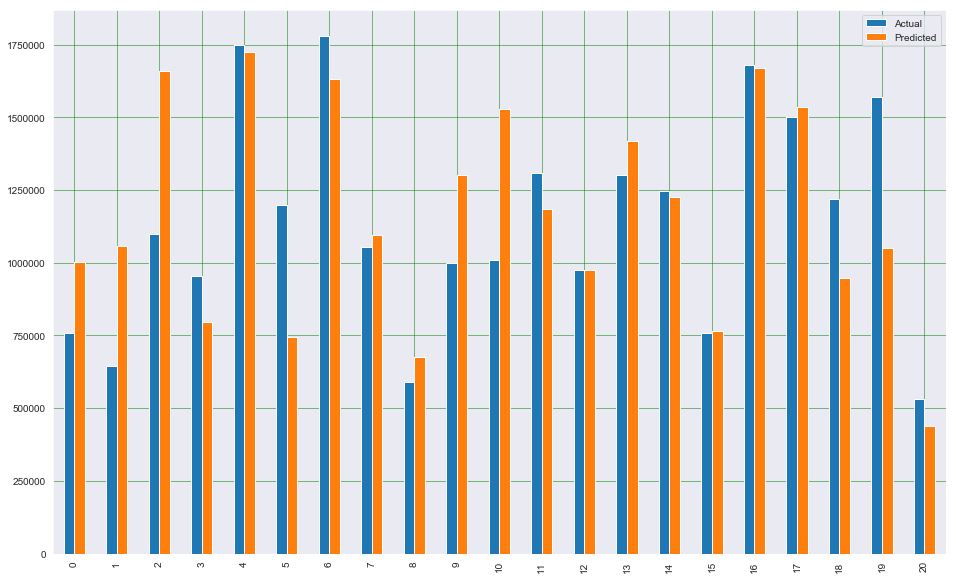

In [36]:
#predicted and actual price values for 20 test data.
y_pred = np.array(lin_reg.predict(X_test))
y_test = np.array(y_test)                         
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
df1 = df.head(21)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()